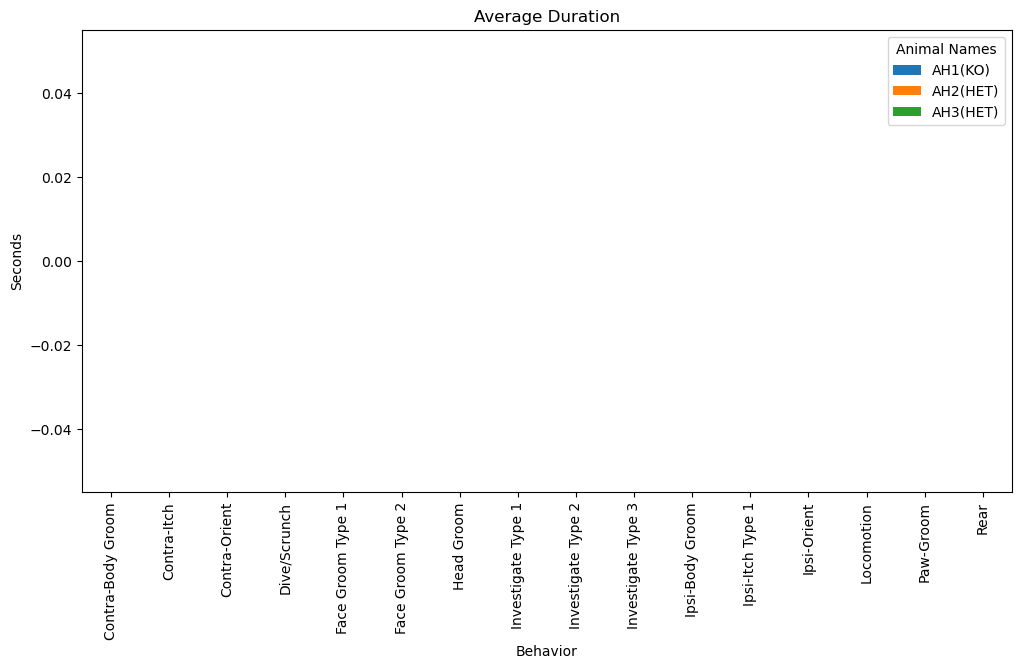

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Create a function to read and parse a CSV file, including animal name extraction
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        lines = csvfile.readlines()
        if len(lines) > 0:
            first_line = lines[0].strip().split('-')
            if len(first_line) >= 2:
                animal_name = first_line[0].strip()

        reader = pd.read_csv(filename, skiprows=1)  # Skip the first row (header)
        for index, row in reader.iterrows():
            if animal_name:
                key = row[0]
                value = int(row[1])
                data[animal_name] = data.get(animal_name, {})
                data[animal_name][key] = value

    return data

# Create a tkinter root window (it will not be shown)
root = tk.Tk()
root.withdraw()  # Hide the root window

# Open a file dialog for selecting CSV files
file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    # Initialize lists to store data for plotting
    keys = []
    values = []
    colors = []

    # Loop through selected CSV files
    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    # Create a DataFrame from the parsed data
    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})

    # Pivot the DataFrame to prepare for plotting
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Plot the data as a bar plot with color-coded bars
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Total Bouts')
    plt.xlabel('Behavior')
    plt.ylabel('Total Bouts')
    plt.legend(title='Animal Names')

    # Show the plot
    plt.show()

# Close the tkinter root window
root.destroy()


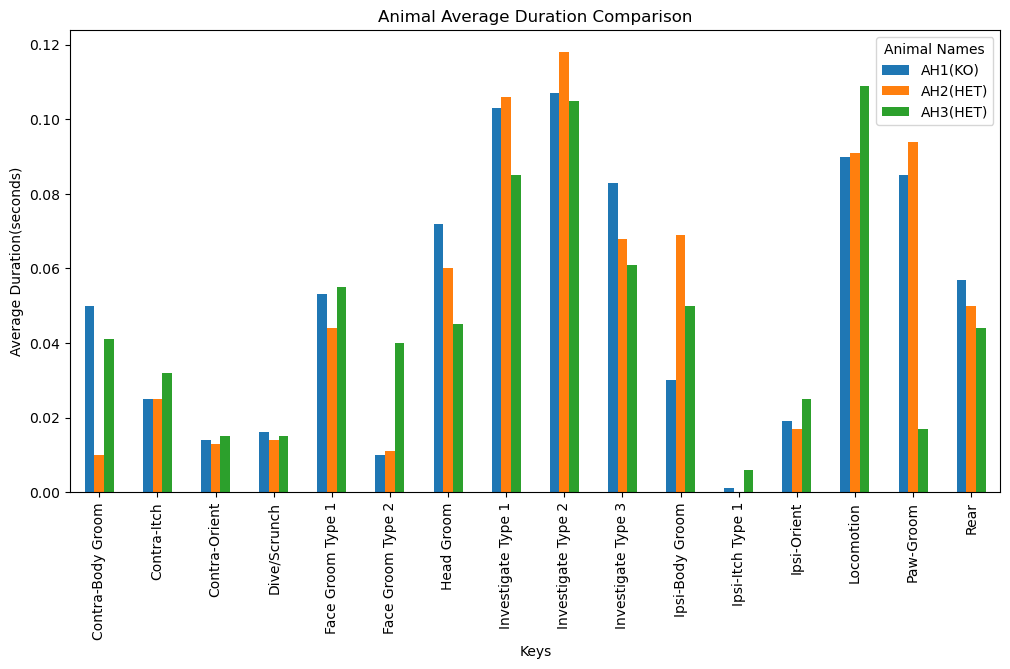

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Create a function to read and parse a CSV file, including animal name extraction
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        lines = csvfile.readlines()
        if len(lines) > 0:
            first_line = lines[0].strip().split('-')
            if len(first_line) >= 2:
                animal_name = first_line[0].strip()

        reader = pd.read_csv(filename, skiprows=1)   # Read the CSV without skipping header
        for index, row in reader.iterrows():
            if animal_name:
                key = row['Key']  
                value = row['Average Duration (seconds)']
                data[animal_name] = data.get(animal_name, {})
                data[animal_name][key] = value

    return data

# Create a tkinter root window (it will not be shown)
root = tk.Tk()
root.withdraw()  # Hide the root window

# Open a file dialog for selecting CSV files
file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    # Initialize lists to store data for plotting
    keys = []
    values = []
    colors = []

    # Loop through selected CSV files
    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    # Create a DataFrame from the parsed data
    df = pd.DataFrame({'Keys': keys, 'Average Duration': values, 'Animal': colors})

    # Pivot the DataFrame to prepare for plotting
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Average Duration')

    # Plot the data as a bar plot with color-coded bars
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Animal Average Duration Comparison')
    plt.xlabel('Keys')
    plt.ylabel('Average Duration(seconds)')
    plt.legend(title='Animal Names')

    # Show the plot
    plt.show()

# Close the tkinter root window
root.destroy()
